## Mapping plot / Figure 1

All files on farm in `/home/ctbrown/scratch3/2025-workflow-core99/`

In [1]:
# base checkout of workflow directory is here:
BASE='/home/ctbrown/scratch3/2025-workflow-core99/'

# outputs from running `do_mapping`:
BASE_OUTPUTS=BASE+'/outputs.mapping/'

# where to place figures
FIG_OUT=BASE+'/outputs.figures/'

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

In [3]:
NAMES = [ x.strip() for x in open(BASE+'/inputs.mapping/names.list') ]
print(f'loaded {len(NAMES)} core species names')

NAMES.sort()
NAMES

loaded 18 core species names


['s__Bariatricus sp004560705',
 's__Butyricicoccus_A intestinisimiae',
 's__Cryptobacteroides sp900546925',
 's__Fimisoma sp002320005',
 's__Gemmiger qucibialis',
 's__Holdemanella porci',
 's__JAFBIX01 sp021531895',
 's__JALFVM01 sp022787145',
 's__Lactobacillus amylovorus',
 's__Mogibacterium_A kristiansenii',
 's__Oscillibacter segnis',
 's__Phascolarctobacterium_A succinatutens',
 's__Phocaeicola vulgatus',
 's__Prevotella sp000434975',
 's__Prevotella sp002251295',
 's__Roseburia inulinivorans',
 's__Sodaliphilus sp004557565',
 's__UBA2868 sp004552595']

In [4]:
dflist = []

for name in NAMES:
    rand_df = pl.read_csv(BASE_OUTPUTS + f'bams.rand/{name}.readstats.csv').with_columns(
        pl.lit(name).alias("species"),
        pl.lit("100 randomly chosen metagenomes").alias("type"),
    )
    assert len(rand_df) == 100, "expect 100 random metagenomes, dude"

    lowest_df = pl.read_csv(BASE_OUTPUTS + f'bams.lowest/{name}.readstats.csv').with_columns(
        pl.lit(name).alias("species"),
        pl.lit("37 metagenomes with lowest detection").alias("type"),
    )
    assert len(lowest_df) == 37, "expect 37 lowest metagenomes, dude"

    combo_df = pl.concat([rand_df, lowest_df])
    combo_df = combo_df.with_columns(
        (pl.col("count") / 1e3).alias("count_k"),
        (pl.col("species").str.slice(3)).alias("name"),
    )
    dflist.append(combo_df)

mapping_df = pl.concat(dflist)
mapping_df

,metag,count,species,type,count_k,name
i64,str,i64,str,str,f64,str
0,"""ERR3211766""",319898,"""s__Bariatricus sp004560705""","""100 randomly chosen metagenome…",319.898,"""Bariatricus sp004560705"""
1,"""SRR11126273""",157098,"""s__Bariatricus sp004560705""","""100 randomly chosen metagenome…",157.098,"""Bariatricus sp004560705"""
2,"""SRR8960968""",1232994,"""s__Bariatricus sp004560705""","""100 randomly chosen metagenome…",1232.994,"""Bariatricus sp004560705"""
3,"""SRR14369136""",791660,"""s__Bariatricus sp004560705""","""100 randomly chosen metagenome…",791.66,"""Bariatricus sp004560705"""
4,"""SRR17241596""",2704645,"""s__Bariatricus sp004560705""","""100 randomly chosen metagenome…",2704.645,"""Bariatricus sp004560705"""
…,…,…,…,…,…,…
32,"""ERR1135268""",1049242,"""s__UBA2868 sp004552595""","""37 metagenomes with lowest det…",1049.242,"""UBA2868 sp004552595"""
33,"""SRR12795773""",719897,"""s__UBA2868 sp004552595""","""37 metagenomes with lowest det…",719.897,"""UBA2868 sp004552595"""
34,"""SRR11489751""",1341434,"""s__UBA2868 sp004552595""","""37 metagenomes with lowest det…",1341.434,"""UBA2868 sp004552595"""


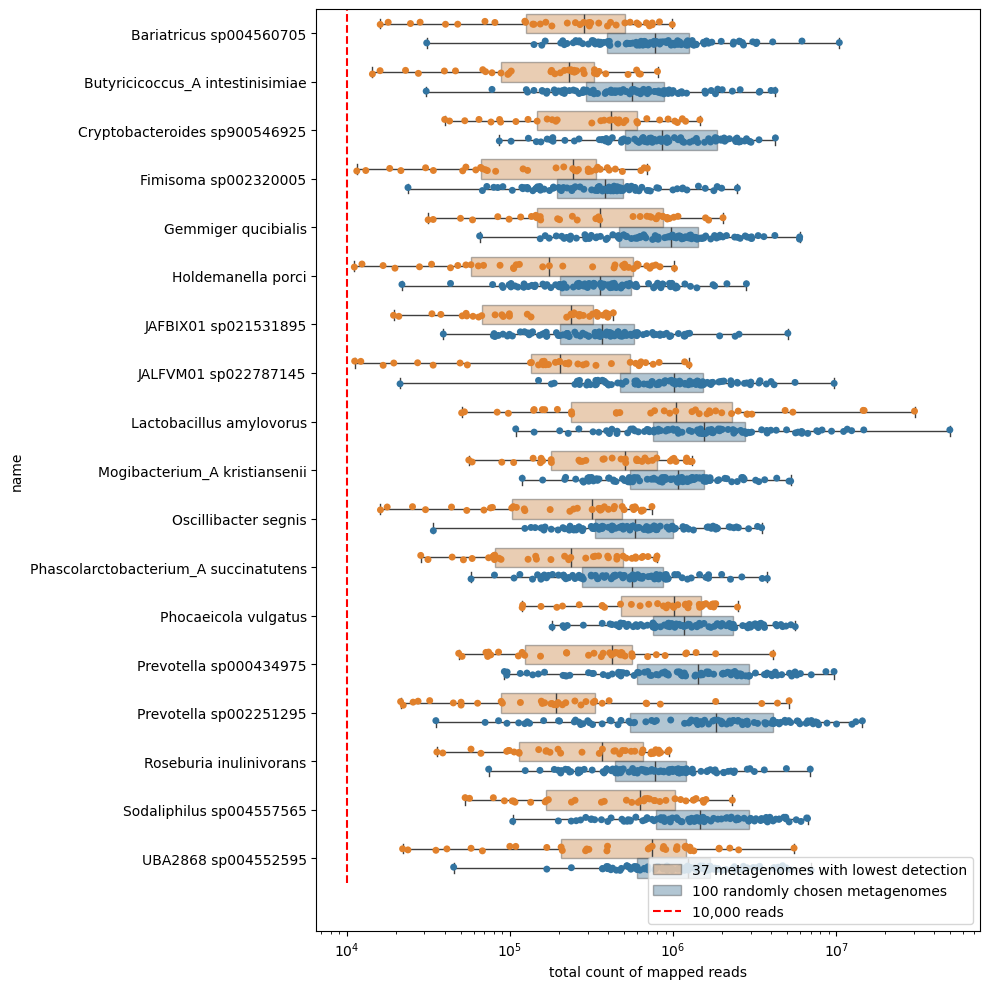

In [5]:
# Source - https://stackoverflow.com/a
# Posted by JohanC, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-03, License - CC BY-SA 4.0

hue_order=["37 metagenomes with lowest detection", "100 randomly chosen metagenomes"]
palette={ hue_order[1]: (0.19460784313725488, 0.45343137254901944, 0.632843137254902),
          hue_order[0]: (0.8818627450980391, 0.5053921568627451, 0.17303921568627467)}
#palette = None

plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=mapping_df, y="name", x="count", hue="type",
                 hue_order=hue_order, palette=palette, boxprops={'alpha': 0.4}, whis=(0, 100))
sns.stripplot(data=mapping_df, y="name", x="count", hue="type", 
              hue_order=hue_order, palette=palette, dodge=True, ax=ax, legend=False)
handles, labels = ax.get_legend_handles_labels()
ax.set_xlabel("total count of mapped reads")

# print out default bar colors if we want:
#bar_colors = set([bar.get_facecolor() for bar in ax.patches])
#print(f"Colors of the bars: {bar_colors}")

# set ylim to provide room for legend
ylim = ax.get_ylim()
ax.set_ylim(18.5, -0.5)
#print('ylim:', ylim)

ax.plot([10000, 10000], ylim, '--', color='red', label="10,000 reads")
ax.legend(loc='lower right')
ax.set_xscale('log')

plt.tight_layout()

plt.savefig(FIG_OUT + '/figure1-mapping.png')

### CAPTION: Figure 1: Metagenome read mapping confirms presence for 18 species.

Counts for metagenome reads mapped to 18 bacterial pangenomes, for two different subsets of 3,216 Illumina paired-end pig gut metagenomes. The orange points are read mapping counts for reads from the 35 distinct metagenomes that contain the five lowest k-mer detection scores for each of the 18 pangenomes. The blue points are read mapping counts for 100 metagenomes chosen to represent datasets generated from distinct individuals across the full range of countries of origin. The boxplots contain the middle 50% of the data, with the whiskers covering the full range of points. The red dashed line is set at 10,000 read counts to visually indicate the lower bound on read mapping counts for the lowest-mapped pangenome (11,157 reads, for *s__Holdemanella porci*). The X axis shows absolute read counts in units of 1000 in log scale.